<a href="https://colab.research.google.com/github/bijjamanogna/action/blob/main/Action_Recognition_HMDB51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Action Recognition from Video

In this project i am using HMDB51 dataset to recognize action from videos

# New Section

## Colab
This code is running on colab.


# Step 1: Connect Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# change path
%cd 'My Drive'

/gdrive/My Drive


## Create New Folder for Project

In [ ]:
# this  new folder for HMDB dataset
!mkdir 'Action Recognition'

mkdir: cannot create directory ‘Action Recognition’: File exists


In [ ]:
# switch to folder
%cd 'Action Recognition'

/gdrive/My Drive/Action Recognition


## Download HMDB51 Dataset for action recognition

In [ ]:
# download dataset using the command
#!wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar

In [ ]:
ls

'2020-02-23 21-16-43.mp4'   foreground/   model.png
 conv_lstm_2d.h5            hmdb51/       testTrainMulti_7030_splits/


In [ ]:
# !mkdir 'hmdb51'
# %cd 'hmdb51'

## Unzip HMDB Dataset

In [ ]:
# unzip rar file of dataset
# !unrar x ../hmdb51_org.rar
# !unzip \*.zip

In [ ]:
ls

'2020-02-23 21-16-43.mp4'   foreground/   model.png
 conv_lstm_2d.h5            hmdb51/       testTrainMulti_7030_splits/


i have already completed above steps so i dont need to repeat them.

# Step 2

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define how many frame per video you will use, along with width and height 
# of frames
frames = 15
Width = 256
Height = 256

# Load Data
in this project we have video, which take lots of memory, so in order to save
memory i am only loading the path of videos and its labele.

In [ ]:
def load_video_names(path):
  '''
  this function will load videos from folder
  '''
  videos = []  # list to store videos names only
  labels = []  # list to store video labels, which are action performed in video
  for category in os.listdir(path): # this will go through all folders
    for video in os.listdir(path+"/"+category):  # this will go through all videos in a folder
      videos.append(path+"/"+category+"/"+video) # this is complete path of video
      labels.append(category) # this is label
  return np.array(videos), np.array(labels) 


def preprocess(frame):
  '''
  convert each frame pixels in range between -1 and +1
  '''
  frame = cv2.resize(frame, (Width, Height)) # resize frames
  # normalize frame pixels -1 to +1
  frame = frame-127.5   
  frame = frame/127.5
  return frame


def load_video(video_path):
  '''
  this function will load video from its path,
  this will be used only when training.
  it will return a single video only.
  '''
  
  video_frames = [] # frame of a single video
  cap = cv2.VideoCapture(video_path) # path of video, to laod video using opencv
  while True:
    ret, frame = cap.read()
    if ret == True:
      video_frames.append(preprocess(frame)) # store all frames
    else:
      break
  cap.release()
  video_frames = select_frames(video_frames) # this is used to choose specific frames
  if len(video_frames) != frames:  # if we have desired number of frames or not.
    print('short_video ',video_path, len(video_frames))

  return np.array(video_frames)


def select_frames(video_frames):
  '''
  this will choose desired number of frame, since some video have more frames 
  '''
  selected_frames = []
  if len(video_frames) > frames:
    fn = len(video_frames)//frames # this will be used to select every nth frame
    f_num = 0
    for f in video_frames:
      if len(selected_frames) < frames:
        if f_num % fn == 0:
          selected_frames.append(f)
      f_num += 1
  else:
    selected_frames = video_frames
  return selected_frames


def create_dataset(videos, labels, indx):
  '''
  this function will be used to load batch of video by using previous function 
  which load single video.
  parameteres:
  videos: path of all videos
  labels: output labels of videos
  indx: index of videos to be used in batch
  '''
  X = []
  y = []
  for video, label in zip(videos[indx], labels[indx]):
    X.append(load_video(video))
    y.append(label)
  
  return np.array(X),np.array(y)

In [ ]:
import glob

split_1 = glob.glob("testTrainMulti_7030_splits/*split1.txt")

In [ ]:
train_videos = []
train_label = []
valid_videos = []
valid_label = []

for f in split_1:
  label = f.split(os.path.sep)[-1].split(".")[0]
  label = '_'.join(label.split("_")[:-2])
  print(label)
  data = open(f, "r").read().strip(" ").strip("\n").split("\n")
  for d in data:
    d = d.split(' ')
    name, split = d[0], d[1]
    video_path = os.path.join(label, name)
    video_path = os.path.join("hmdb51", video_path)
    if split == "1":
      train_videos.append(video_path)
      train_label.append(label)
    if split == "0":
      valid_videos.append(video_path)
      valid_label.append(label)


push
climb
cartwheel
drink
ride_horse
golf
kick
pick
dribble
brush_hair
punch
flic_flac
jump
laugh
ride_bike
shoot_ball
pullup
fencing
hug
draw_sword
pushup
pour
shake_hands
fall_floor
hit
dive
kiss
shoot_gun
situp
run
handstand
eat
climb_stairs
kick_ball
shoot_bow
sit
smoke
stand
sword
swing_baseball
sword_exercise
talk
somersault
turn
walk
throw
wave
smile
catch
chew
clap


In [ ]:
train_videos = np.array(train_videos)
train_label = np.array(train_label)
valid_videos = np.array(valid_videos)
valid_label = np.array(valid_label)

In [ ]:
# videos, labels = load_video_names('./hmdb51') # this will load all labels and video paths
train_samples = len(train_videos)
valid_samples = len(valid_videos)

In [ ]:
# total videos
print(train_samples)
print(valid_samples)

3570
1666


In [ ]:
# number of output labels
classes = len(np.unique(train_label))

In [ ]:
# output classes
classes

51

In [ ]:
#print(np.unique(labels, return_counts=True))
labels_counts = np.unique(train_label, return_counts=True)
for l,n in zip(labels_counts[0],labels_counts[1]):
  print(l,' > ',n)

brush_hair  >  70
cartwheel  >  70
catch  >  70
chew  >  70
clap  >  70
climb  >  70
climb_stairs  >  70
dive  >  70
draw_sword  >  70
dribble  >  70
drink  >  70
eat  >  70
fall_floor  >  70
fencing  >  70
flic_flac  >  70
golf  >  70
handstand  >  70
hit  >  70
hug  >  70
jump  >  70
kick  >  70
kick_ball  >  70
kiss  >  70
laugh  >  70
pick  >  70
pour  >  70
pullup  >  70
punch  >  70
push  >  70
pushup  >  70
ride_bike  >  70
ride_horse  >  70
run  >  70
shake_hands  >  70
shoot_ball  >  70
shoot_bow  >  70
shoot_gun  >  70
sit  >  70
situp  >  70
smile  >  70
smoke  >  70
somersault  >  70
stand  >  70
swing_baseball  >  70
sword  >  70
sword_exercise  >  70
talk  >  70
throw  >  70
turn  >  70
walk  >  70
wave  >  70


In [ ]:
# encode labels in to one hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
le.fit(np.unique(train_label))
train_encoded_labels = le.transform(train_label)
train_encoded_labels = np.reshape(train_encoded_labels, (-1,1))

encoder = OneHotEncoder()
encoder.fit(train_encoded_labels)
train_encoded_labels = encoder.transform(train_encoded_labels)

valid_encoded_labels = le.transform(valid_label)
valid_encoded_labels = np.reshape(valid_encoded_labels, (-1,1))

valid_encoded_labels = encoder.transform(valid_encoded_labels)

In [ ]:
# convert encoding to array
train_encoded_labels = train_encoded_labels.toarray()
valid_encoded_labels = valid_encoded_labels.toarray()

In [ ]:
# keras import for model
from keras.models import Input, Model
from keras.layers import TimeDistributed, LSTM
from keras.layers import ConvLSTM2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, LeakyReLU, BatchNormalization
from keras.layers import Dense, Flatten, GlobalMaxPooling2D
from keras.layers import MaxPooling3D
from keras.layers import concatenate

from keras.optimizers import Adam

In [ ]:
def res_block(model, filters):
  '''
  this is residual block, used for feature extraction
  it contain 1 CNN layer and leaky rely action function 
  '''
  #model = TimeDistributed(Conv2D(filters=filters, 
  #kernel_size=3, padding='same'))(model)
  start_block = model
  model = Conv2D(filters=filters, kernel_size=3, padding='same')(model)
  model = BatchNormalization(momentum=0.9)(model)
  model = LeakyReLU(0.2)(model)
  return concatenate([start_block, model])


def create_model():
  '''
  my model, it uses ConvLSTM2D layer,
  because video is spatial and temporal data.
  '''
  input_layer = Input(shape=(frames,Width,Height,3))

  model = ConvLSTM2D(32,3,padding='same', return_sequences=False)(input_layer)
  model = BatchNormalization(momentum=0.9)(model)
  model = LeakyReLU(0.2)(model)

  filters = 64

  for _ in range(6):
    # it has y residual block
    model = res_block(model, filters)
    try:
      model = MaxPooling3D((2,2,2))(model)
    except:
      model = MaxPooling2D((2,2))(model)
    if filters < 512:
      filters *= 2
  
#  model = TimeDistributed(Conv2D(filters,3,padding='same'))(model)
  #model = TimeDistributed(GlobalMaxPooling2D())(model)  
  model = Flatten()(model)

  # output layer
  model = Dense(classes, activation='softmax')(model)

  model = Model(input_layer, model)

  #
  model.compile(optimizer=Adam(learning_rate=1e-4), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  return model

In [ ]:
classifier = create_model()

In [ ]:
classifier.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15, 256, 256 0                                            
__________________________________________________________________________________________________
conv_lst_m2d (ConvLSTM2D)       (None, 256, 256, 32) 40448       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv_lst_m2d[0][0]               
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

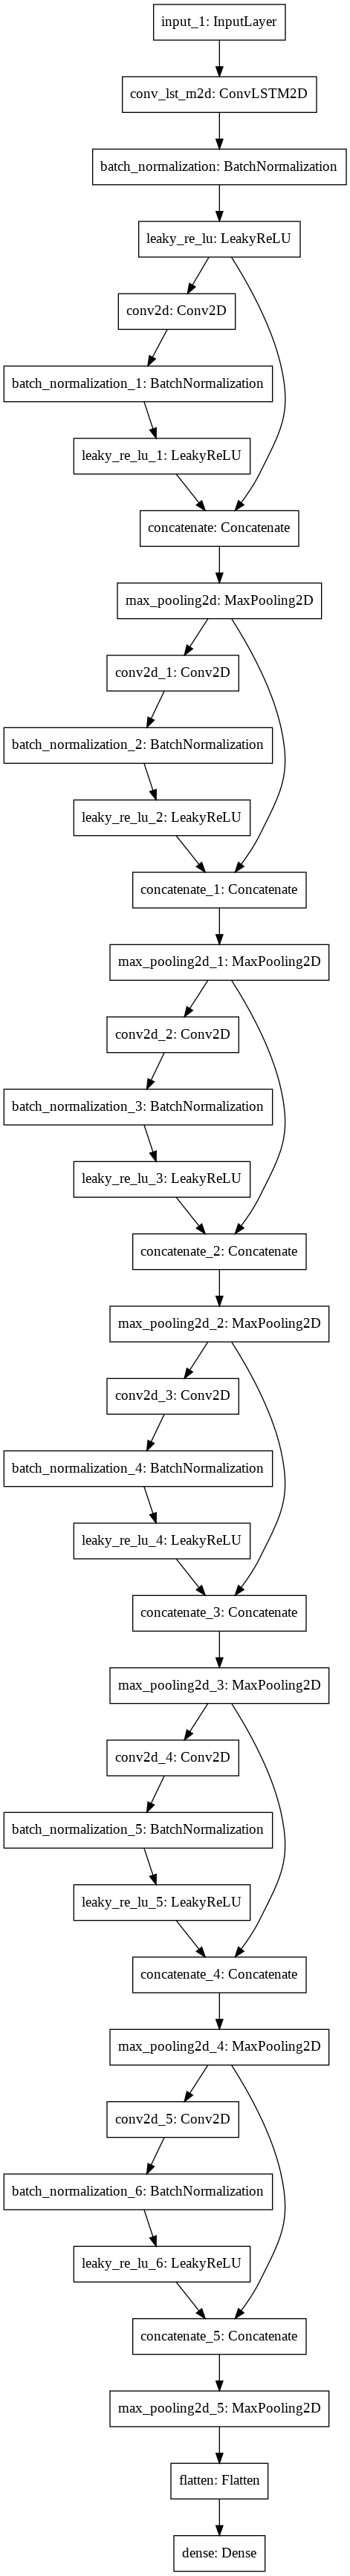

In [ ]:
from keras.utils import plot_model
plot_model(classifier)

In [ ]:
# path to save model
model_name = './conv_lstm_2d.h5'

In [ ]:
# try to load pretrain weights
try:
  classifier.load_weights(model_name)
except:
  print("Cannot Load Model")

In [ ]:
def valid():
  batch_size = 4 # batch size

  # total batches
  if train_samples//batch_size < train_samples/batch_size:
    batches = (train_samples//batch_size)+1
  else:
    batches = train_samples//batch_size
  index = list(range(train_samples)) 

  accuracy = 0
  for batch in range(batches):
    bs = batch*batch_size
    be = bs+batch_size
    selected_indexes = index[bs:be]

    X,y = create_dataset(train_videos, train_encoded_labels, selected_indexes) # load dataset
    results = classifier.test_on_batch(X,y) # train on batch
    print('\r',batch,'/',batches,' : ',results[0], results[1], end='')
    accuracy += results[1]
  print("\n")
  print('Validation Accuracy = ', accuracy/batches)

In [ ]:
batch_size = 4 # batch size
# total batches
if train_samples//batch_size < train_samples/batch_size:
  batches = (train_samples//batch_size)+1
else:
  batches = train_samples//batch_size

for e in range(100): # epochs
  index = list(range(train_samples))
  np.random.shuffle(index) # random index for batches
#  print(index)
  accuracy = 0
  for batch in range(batches):
    bs = batch*batch_size
    be = bs+batch_size
    selected_indexes = index[bs:be]

    X,y = create_dataset(train_videos, train_encoded_labels, selected_indexes) # load dataset
    results = classifier.train_on_batch(X,y) # train on batch
    print('\r',batch,'/',batches,' : ',results[0], results[1], end='')
    accuracy += results[1]
  print('\r> ',e,', Accuracy = ', accuracy/batches)
  valid()
  classifier.save_weights(model_name)

>  0 , Accuracy =  0.8513437849944009
 892 / 893  :  0.003345403354614973 1.0

Validation Accuracy =  0.8866181410974244
>  1 , Accuracy =  0.883538633818589
 892 / 893  :  0.014211432076990604 1.0

Validation Accuracy =  0.8885778275475924
>  2 , Accuracy =  0.8958566629339306
 892 / 893  :  0.00034380314173176885 1.0

Validation Accuracy =  0.8482642777155656
>  3 , Accuracy =  0.893057110862262
 892 / 893  :  12.794866561889648 0.0

Validation Accuracy =  0.8594624860022396
>  4 , Accuracy =  0.8944568868980963
 892 / 893  :  0.688505232334137 0.5

Validation Accuracy =  0.9210526315789473
>  5 , Accuracy =  0.938969764837626
 711 / 893  :  0.00012576396693475544 1.0

In [ ]:
valid()

In [ ]:
# i am not using train and test split.
# this is just a demo code to show you how to train model on video.
# this is already trained, so i am getting close to 100% accuracy.